# Fitbit Jupyter Notebook

## Step 1: Analyse the data

In [500]:
%pip install pandas matplotlib seaborn networkx scikit-learn imbalanced-learn numpy

In [501]:

import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # For handling imbalanced data
import numpy as np

In [502]:
# Define the path and get all CSV files
path = "../datas/Data Coaching Fitbit/"
files = glob.glob(os.path.join(path, "*.csv"))

In [503]:
# List to store data from all CSVs
dfs = []

# Read all CSV files
for file in files:
    df = pd.read_csv(file)

    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])

    # Keep only weekdays (Monday to Friday)
    df = df[df['date'].dt.weekday < 5]

    # Keep only records before 18:00
    df = df[df['date'].dt.hour < 18]

    # Append the cleaned data
    dfs.append(df)

In [504]:
# Concatenate all data
df = pd.concat(dfs, ignore_index=True)

In [505]:

def show_plot(
        x_ticks_rotation=None, x_ticks_ticks=None, x_ticks_label=None,
        tight_layout=None, fig_size=None, title=None, x_label=None,
        y_label=None, legend=False, tile_font_size=None,
        reg_plot_data=None, reg_plot_x=None, reg_plot_y=None,
        reg_plot_scatter=None, reg_plot_ci=None, reg_plot_label=None,
        nbr_of_reg_plot=0, reg_plot_line_kws=None, reg_plot_color=None,
        heatmap_data=None, heatmap_annot=None, heatmap_cmap=None,
        heatmap_center=None, heatmap_fmt=None, heatmap_xticklabels=None,
        heatmap_yticklabels=None,
        dag_graph=None, dag_pos=None, dag_with_labels=None,
        dag_node_size=None, dag_node_color=None, dag_node_font_size=None,
        dag_font_weight=None, dag_edge_color=None,
        bar_plot_x=None, bar_plot_y=None, bar_plot_hue=None,
        bar_plot_palette=None, bar_plot_legend=None
    ):

    fig, ax = plt.subplots(figsize=fig_size if fig_size is not None else (12, 6))

    # Plot regression if data provided
    if nbr_of_reg_plot > 0 and reg_plot_data is not None and reg_plot_x is not None and reg_plot_y is not None:
        # Convert all reg_plot parameters to lists if they aren't already
        if not isinstance(reg_plot_data, list):
            reg_plot_data = [reg_plot_data] * nbr_of_reg_plot
        if not isinstance(reg_plot_x, list):
            reg_plot_x = [reg_plot_x] * nbr_of_reg_plot
        if not isinstance(reg_plot_y, list):
            reg_plot_y = [reg_plot_y] * nbr_of_reg_plot
        if not isinstance(reg_plot_scatter, list):
            reg_plot_scatter = [reg_plot_scatter] * nbr_of_reg_plot
        if not isinstance(reg_plot_ci, list):
            reg_plot_ci = [reg_plot_ci] * nbr_of_reg_plot
        if not isinstance(reg_plot_label, list):
            reg_plot_label = [reg_plot_label] * nbr_of_reg_plot
        if not isinstance(reg_plot_line_kws, list):
            reg_plot_line_kws = [reg_plot_line_kws] * nbr_of_reg_plot
        if not isinstance(reg_plot_color, list):
            reg_plot_color = [reg_plot_color] * nbr_of_reg_plot

        # Plot each regression
        for i in range(nbr_of_reg_plot):
            sns.regplot(
                data=reg_plot_data[i], x=reg_plot_x[i], y=reg_plot_y[i],
                scatter=reg_plot_scatter[i] if reg_plot_scatter[i] is not None else True,
                ci=reg_plot_ci[i],
                label=reg_plot_label[i],
                line_kws=reg_plot_line_kws[i],  # Nouveau paramètre
                color=reg_plot_color[i],
                ax=ax
            )

    # Plot heatmap if data provided
    if heatmap_data is not None:
        if heatmap_xticklabels is not None:
            sns.heatmap(
                data=heatmap_data, annot=heatmap_annot, cmap=heatmap_cmap,
                center=heatmap_center, fmt=heatmap_fmt,
                xticklabels=heatmap_xticklabels, yticklabels=heatmap_yticklabels,
                ax=ax
            )
        else:
            sns.heatmap(
                data=heatmap_data, annot=heatmap_annot, cmap=heatmap_cmap,
                center=heatmap_center,
                ax=ax
            )

    # Plot DAG if data provided
    if dag_graph is not None:
        nx.draw(
            dag_graph, pos=dag_pos, with_labels=dag_with_labels,
            node_size=dag_node_size, node_color=dag_node_color,
            font_size=dag_node_font_size, font_weight=dag_font_weight,
            edge_color=dag_edge_color, ax=ax
        )

    if bar_plot_x is not None and bar_plot_y is not None:
        sns.barplot(
            x=bar_plot_x,
            y=bar_plot_y,
            hue=bar_plot_hue,
            palette=bar_plot_palette,
            legend=bar_plot_legend,
            ax=ax
        )

    # Set x-ticks if provided
    if x_ticks_ticks is not None and x_ticks_label is not None:
        ax.set_xticks(x_ticks_ticks)
        ax.set_xticklabels(x_ticks_label, rotation=x_ticks_rotation if x_ticks_rotation is not None else 0)

    # Set title and labels
    if title is not None:
        ax.set_title(title, fontsize=tile_font_size if tile_font_size is not None else 16)
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)

    # Show legend only if label was provided and legend=True
    if legend and any(label is not None for label in reg_plot_label) if isinstance(reg_plot_label, list) else reg_plot_label is not None:
        ax.legend()

    if tight_layout is not None:
        fig.tight_layout(rect=tight_layout)

    plt.show()

In [506]:
def show_sub_plot(data, plot_config, fig_size=(12, 10), title=None, 
                 xticks_rotation=45, tight_layout=[0, 0, 1, 0.96], 
                 plot_type='line'):
    """
    Version améliorée qui gère différents types de graphiques
    
    Args:
        data: DataFrame contenant les données
        plot_config: Liste de dicts avec configuration pour chaque sous-graphique
        fig_size: Taille de la figure
        title: Titre principal
        xticks_rotation: Rotation des étiquettes x
        tight_layout: Paramètres de mise en page
        plot_type: 'line' ou 'bar' (type de graphique par défaut)
    """
    n_plots = len(plot_config)
    n_rows = int(np.ceil(n_plots / 2))
    
    fig, axes = plt.subplots(n_rows, min(2, n_plots), figsize=fig_size)
    axes = axes.flatten() if n_plots > 1 else [axes]
    
    if title:
        fig.suptitle(title)

    for ax, config in zip(axes, plot_config):
        current_type = config.get('type', plot_type)
        
        if current_type == 'line':
            ax.plot(data[config['x']], data[config['y']], 
                    marker=config.get('marker', 'o'),
                    linestyle=config.get('linestyle', '-'),
                    color=config.get('color'),
                    label=config.get('label'))
        elif current_type == 'bar':
            data[config['y']].plot(kind='bar', ax=ax,
                                  color=config.get('color'),
                                  label=config.get('label'))
        
        ax.set_title(config.get('title', ''))
        ax.set_xlabel(config.get('xlabel', ''))
        ax.set_ylabel(config.get('ylabel', ''))
        
        if 'xticklabels' in config:
            ax.set_xticklabels(config['xticklabels'], rotation=xticks_rotation)
        elif xticks_rotation:
            ax.tick_params(axis='x', rotation=xticks_rotation)
        
        if config.get('legend'):
            ax.legend()

    plt.tight_layout(rect=tight_layout)
    plt.show()

### Plot 1: Analyze activity by persons

In [507]:
def plot_person_data(treatment_id, df):
    # Configuration des graphiques pour les données temporelles
    plot_config = [
        {'x': 'date', 'y': 'steps', 'type': 'line', 'color': None,
         'title': 'Steps Over Time', 'ylabel': 'Steps', 'xlabel': 'Date'},
        
        {'x': 'date', 'y': 'calories', 'type': 'line', 'color': 'red',
         'title': 'Calories Burned Over Time', 'ylabel': 'Calories', 'xlabel': 'Date'},
        
        {'x': 'date', 'y': 'distance', 'type': 'line', 'color': 'green',
         'title': 'Distance Over Time', 'ylabel': 'Distance (km)', 'xlabel': 'Date'},
        
        {'x': 'date', 'y': 'mets', 'type': 'line', 'color': 'purple',
         'title': 'METs Over Time', 'ylabel': 'METs', 'xlabel': 'Date'}
    ]

    # Appel à la nouvelle version de show_sub_plot
    show_sub_plot(
        data=df,
        plot_config=plot_config,
        title=f'Activity Data for Person {treatment_id}',
        fig_size=(12, 10),
        xticks_rotation=45,
        tight_layout=[0, 0, 1, 0.96],
        plot_type='line'  # Valeur par défaut
    )

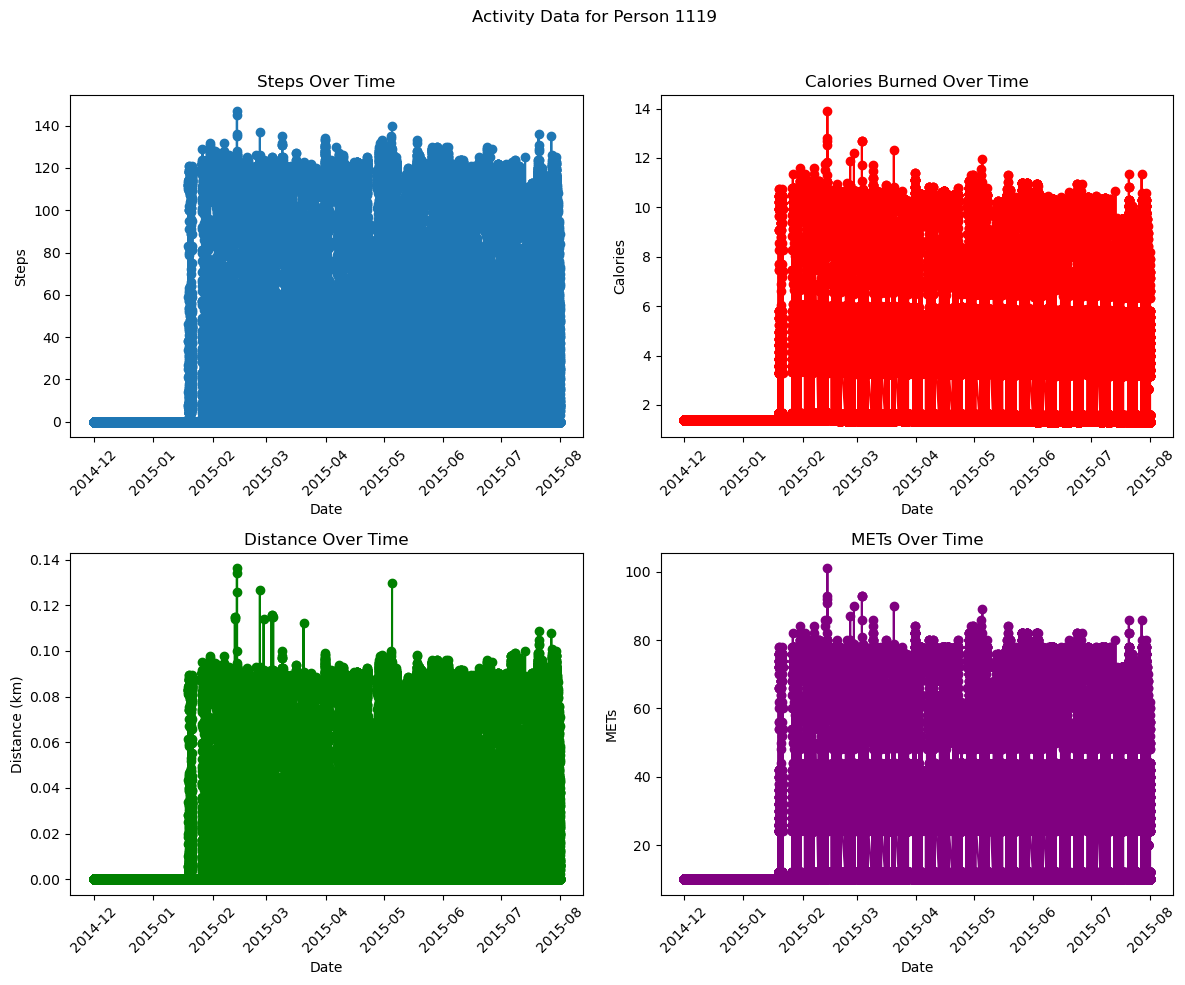

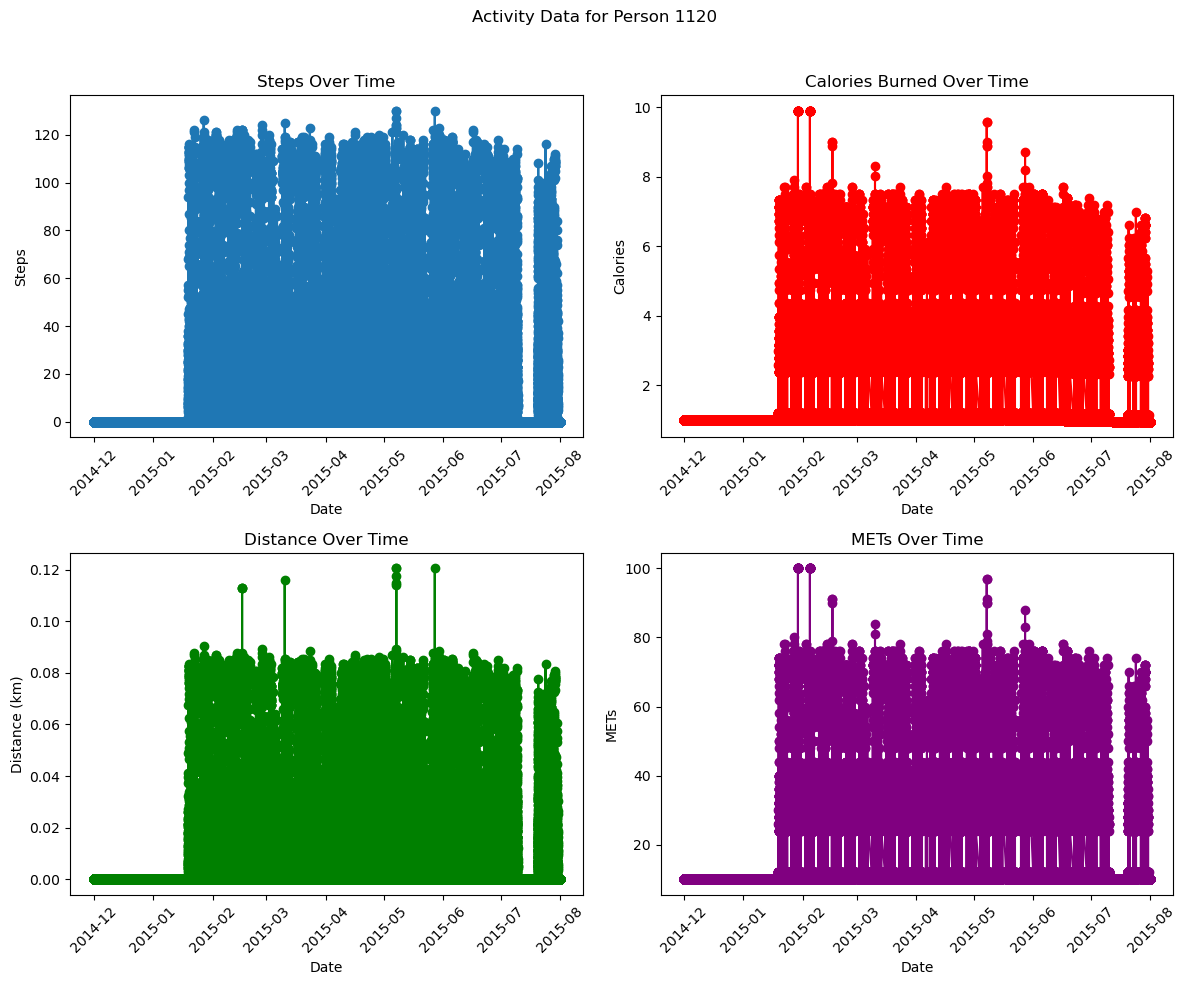

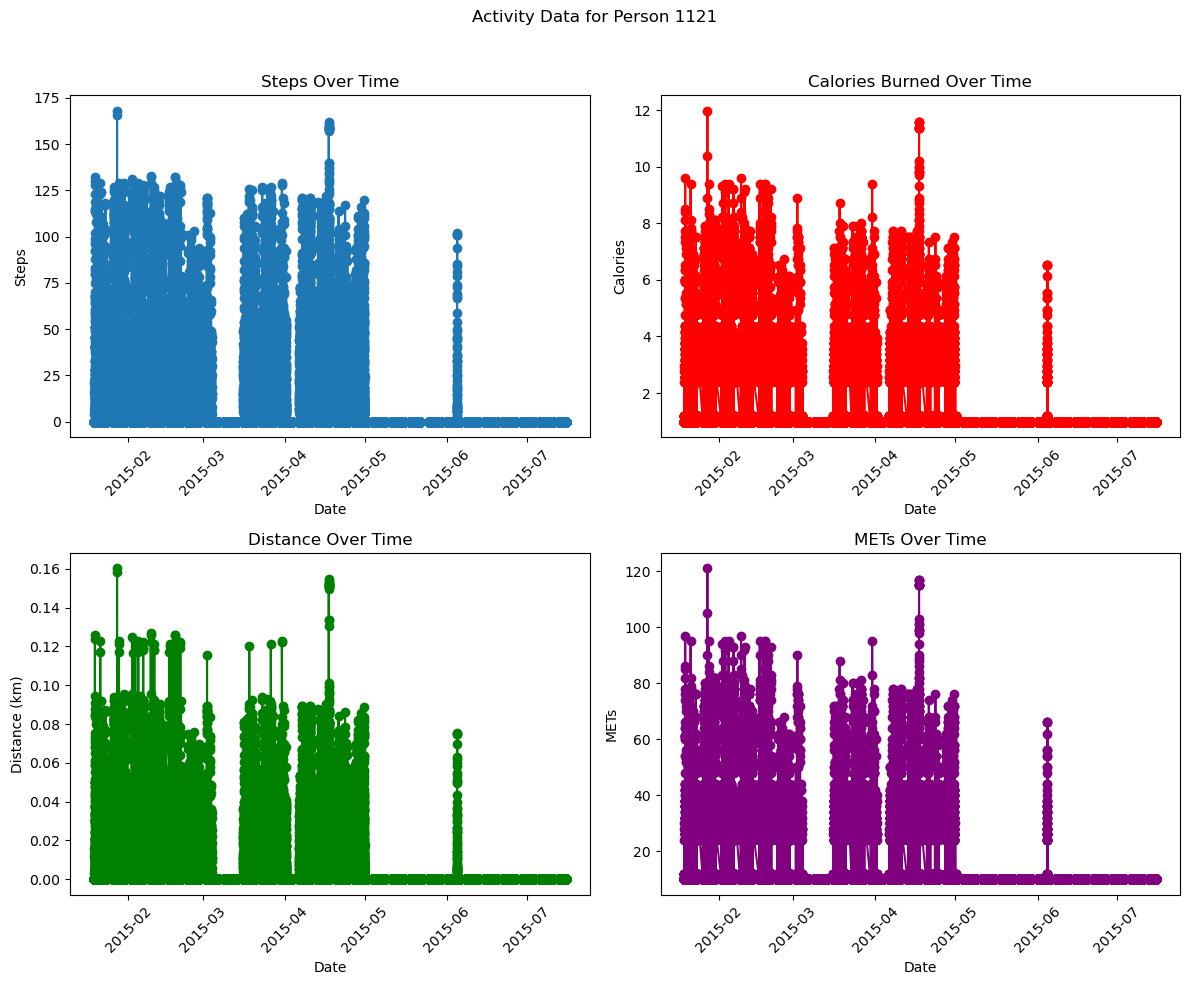

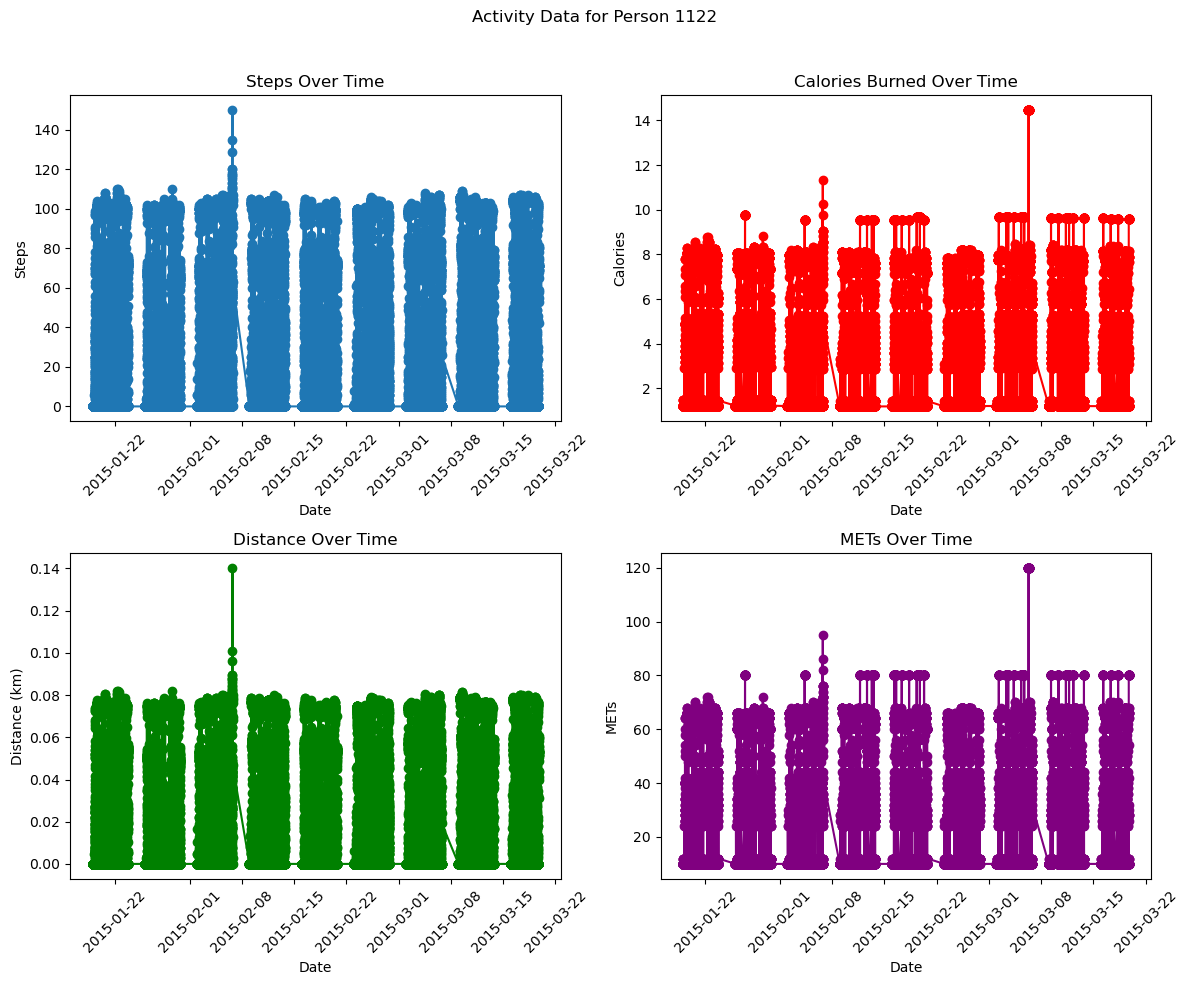

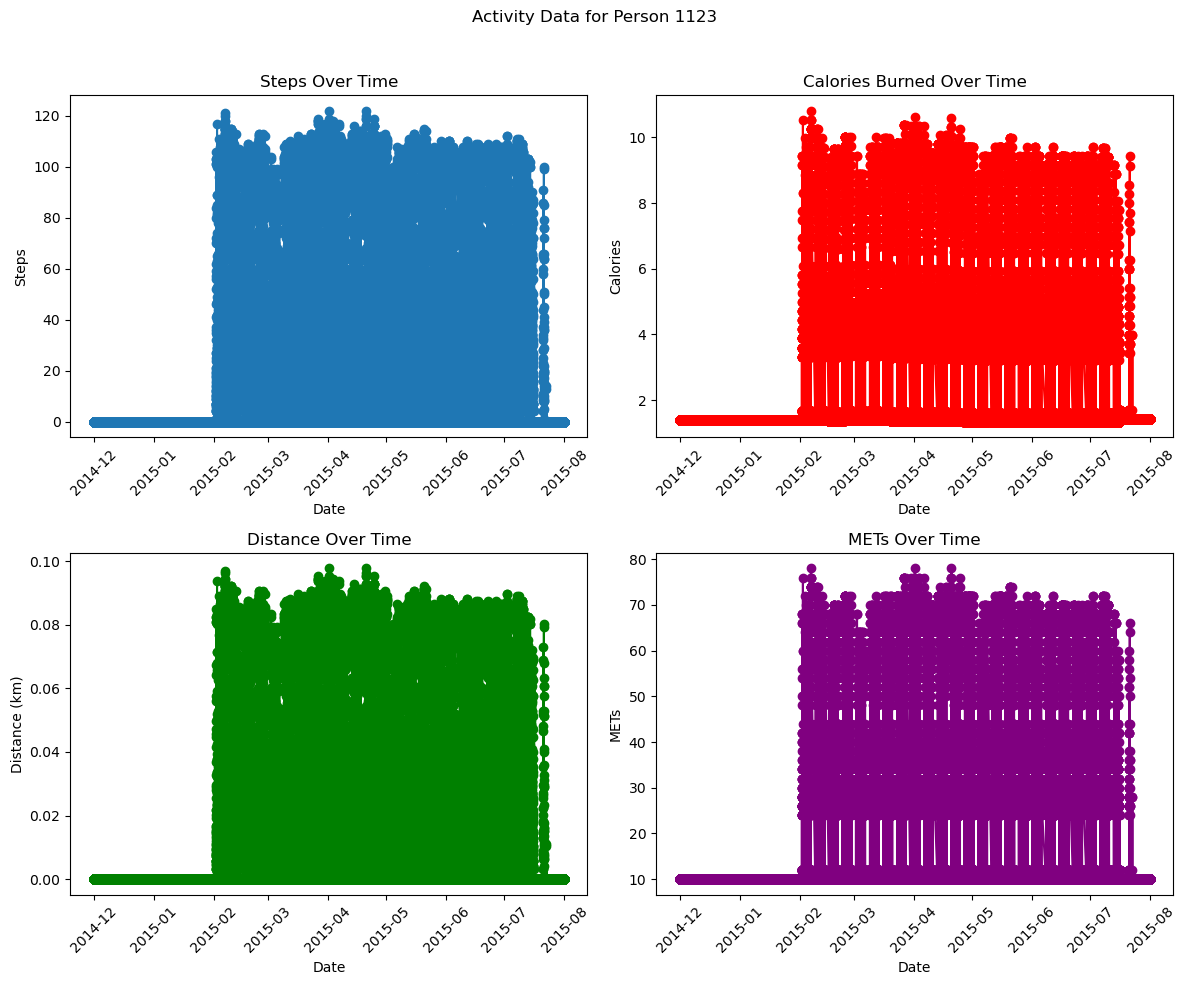

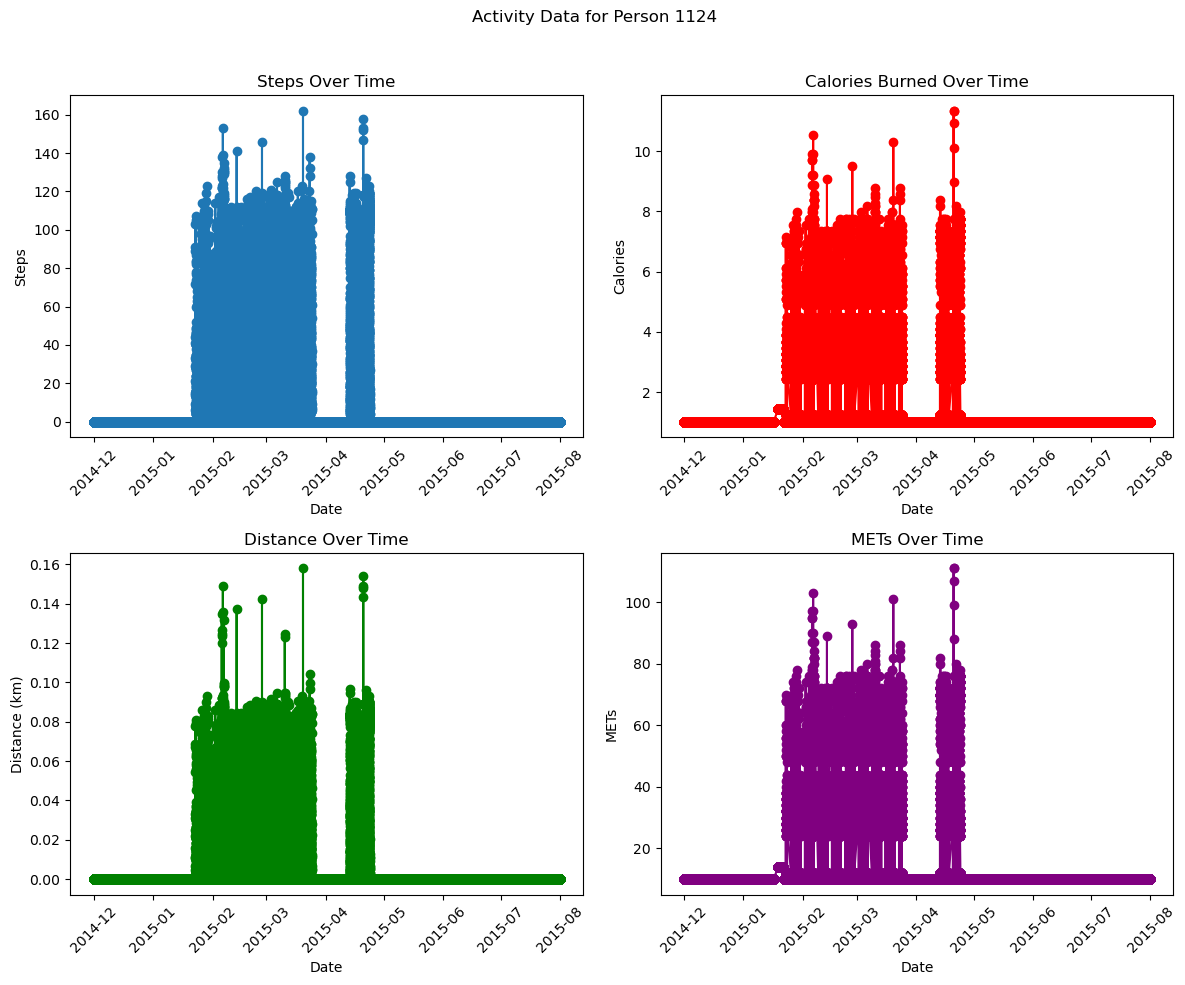

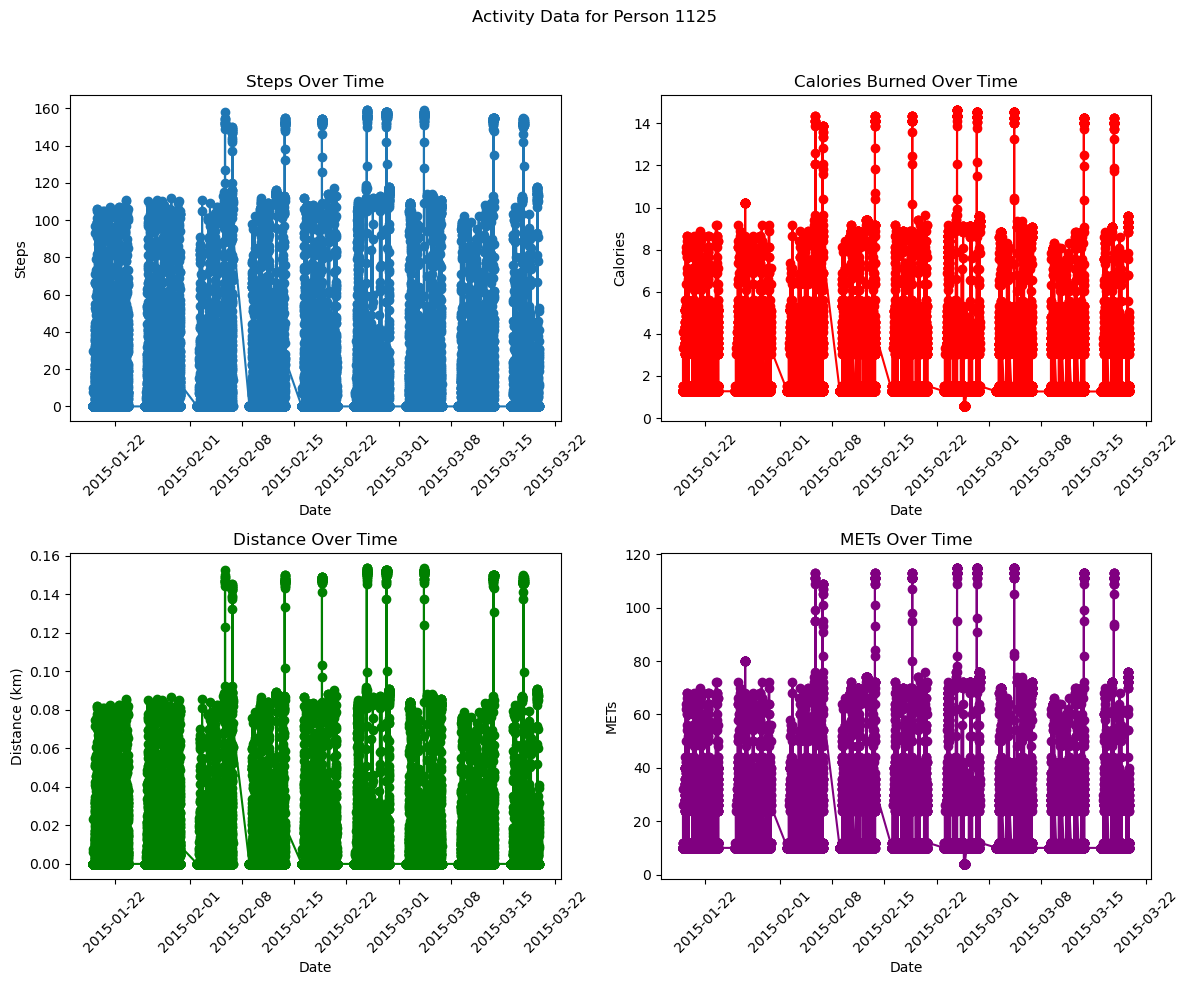

In [508]:
# Group by treatment_id and plot each person's data
for treatment_id, person_df in df.groupby("treatment_id"):
    plot_person_data(treatment_id, person_df)

### Plot 2: Comparison of Activity across individuals

In [509]:
def plot_group_comparison(df):
    # Préparation des données
    df_summary = df.groupby("treatment_id").agg({
        "steps": "mean",
        "calories": "mean",
        "distance": "mean",
        "mets": "mean"
    }).rename(columns={
        "steps": "Avg Steps",
        "calories": "Avg Calories",
        "distance": "Avg Distance",
        "mets": "Avg METs"
    })

    # Configuration des graphiques
    plot_config = [
        {'y': 'Avg Steps', 'type': 'bar', 'color': 'blue',
         'title': 'Average Steps', 'ylabel': 'Steps', 'xlabel': 'Person ID'},
        
        {'y': 'Avg Calories', 'type': 'bar', 'color': 'red',
         'title': 'Average Calories', 'ylabel': 'Calories', 'xlabel': 'Person ID'},
        
        {'y': 'Avg Distance', 'type': 'bar', 'color': 'green',
         'title': 'Average Distance', 'ylabel': 'Distance (km)', 'xlabel': 'Person ID'},
        
        {'y': 'Avg METs', 'type': 'bar', 'color': 'purple',
         'title': 'Average METs', 'ylabel': 'METs', 'xlabel': 'Person ID',
         'xticklabels': df_summary.index}
    ]

    # Appel à la fonction générique
    show_sub_plot(
        data=df_summary,
        plot_config=plot_config,
        title="Comparison of Activity Metrics Across Individuals",
        xticks_rotation=45,
        tight_layout=[0, 0, 1, 0.96],
        plot_type='bar'  # Valeur par défaut pour tous les graphiques
    )

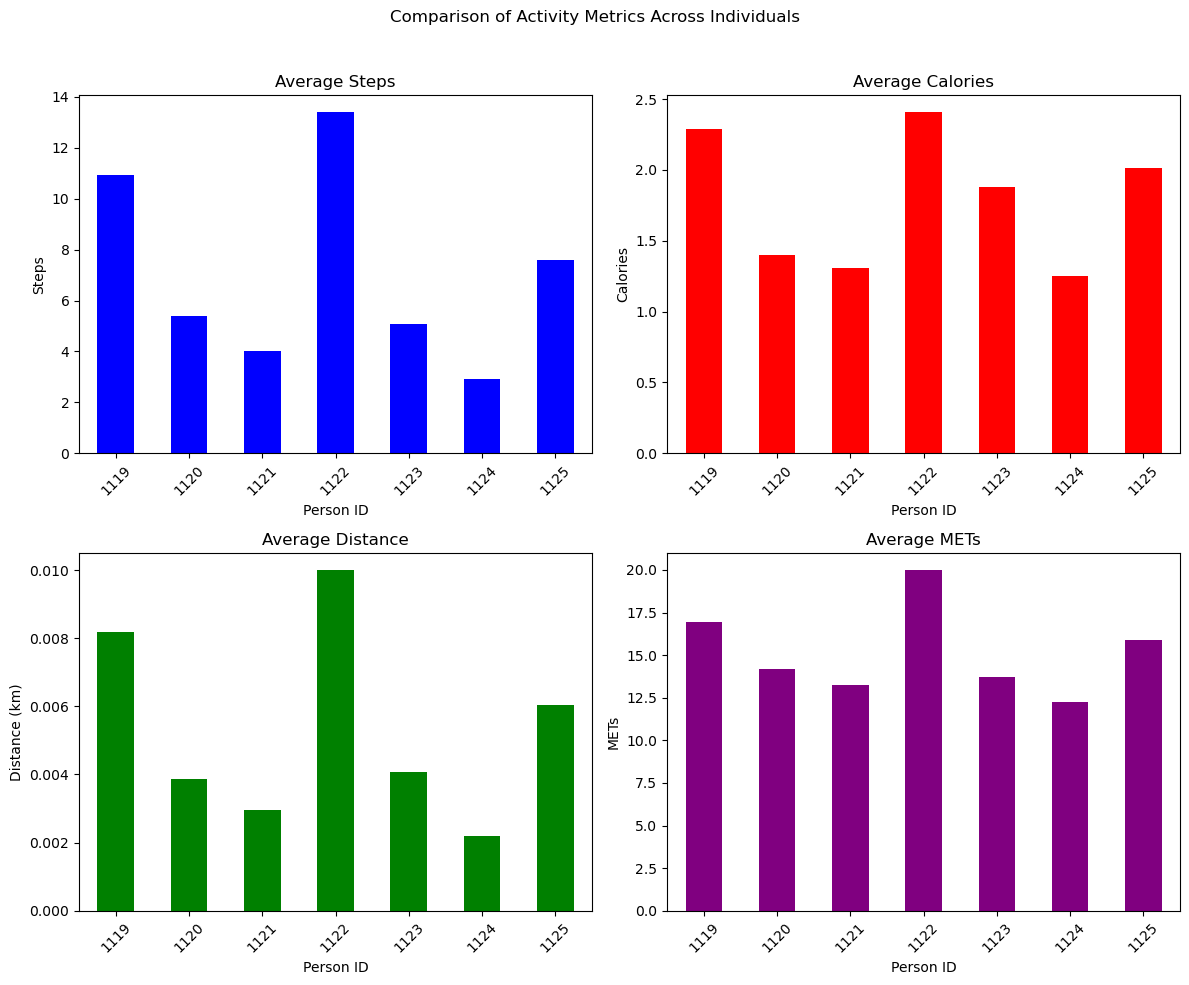

In [510]:
plot_group_comparison(df)

### Plot 3: Individual means

In [511]:
# Compute individual means for steps
individual_means = df.groupby(['treatment_id', df['date'].dt.date])['steps'].mean().reset_index()

In [512]:
# Convert 'date' back to datetime format
individual_means['date'] = pd.to_datetime(individual_means['date'])

In [513]:
treatment_ids = individual_means['treatment_id'].unique()

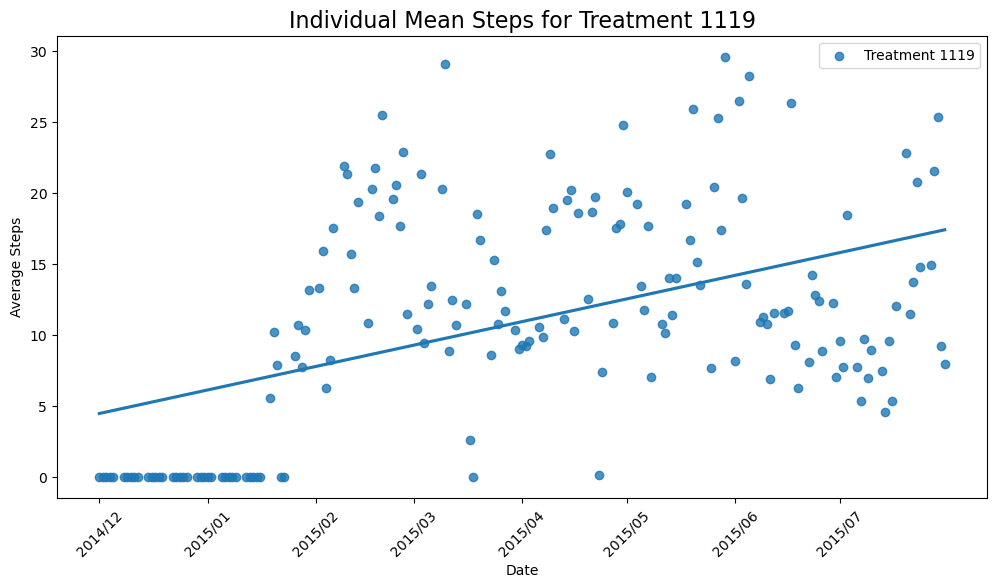

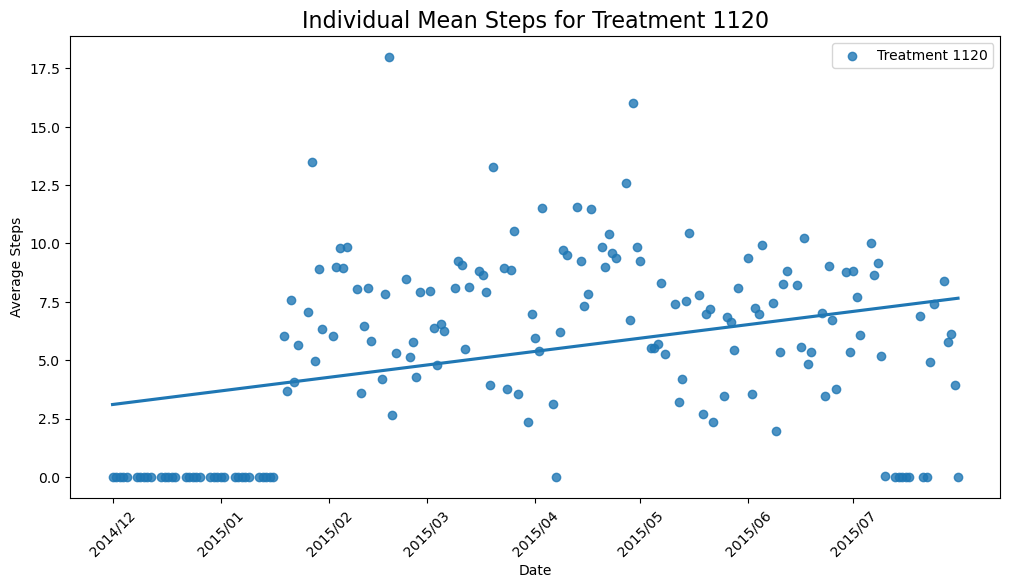

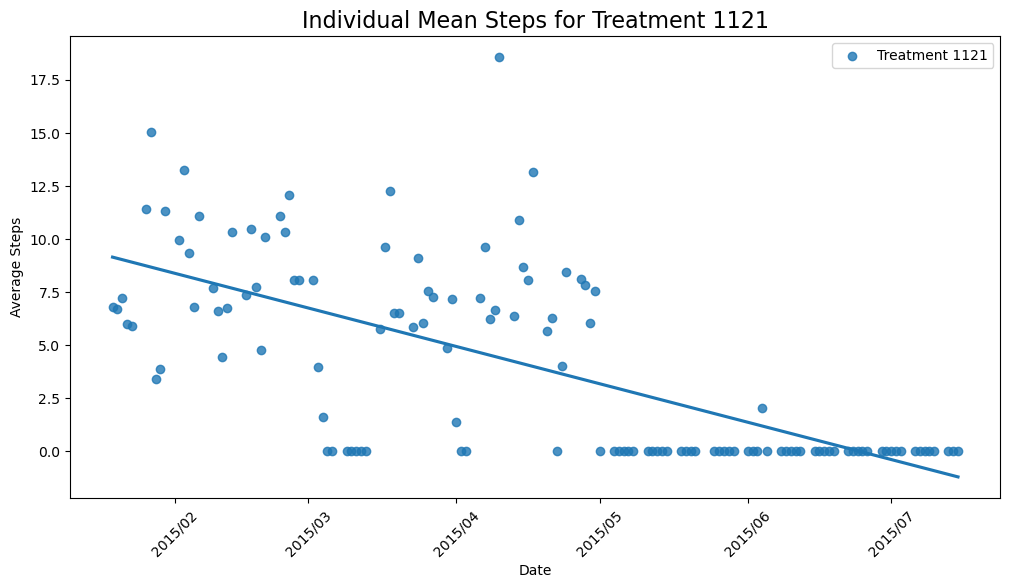

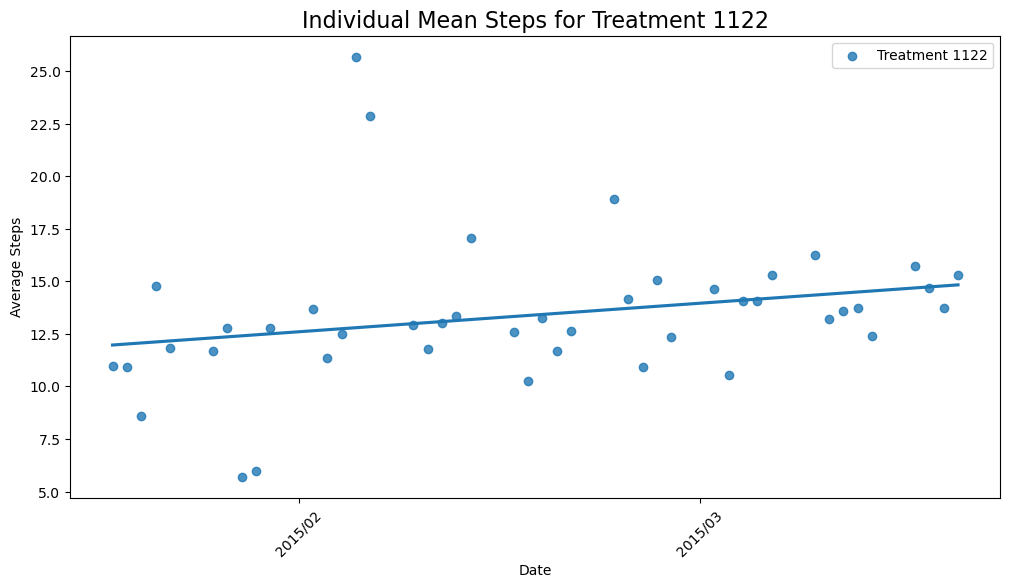

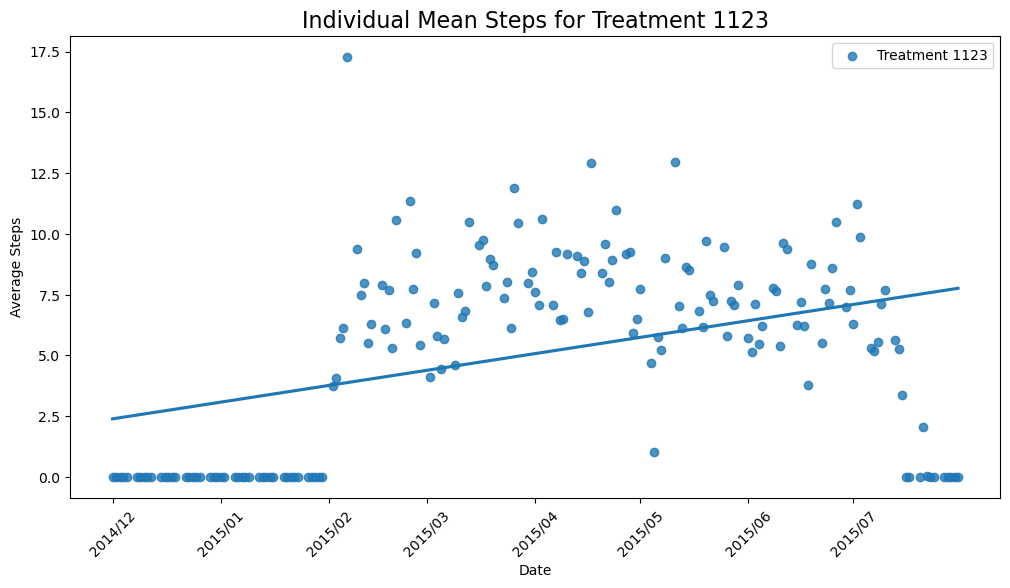

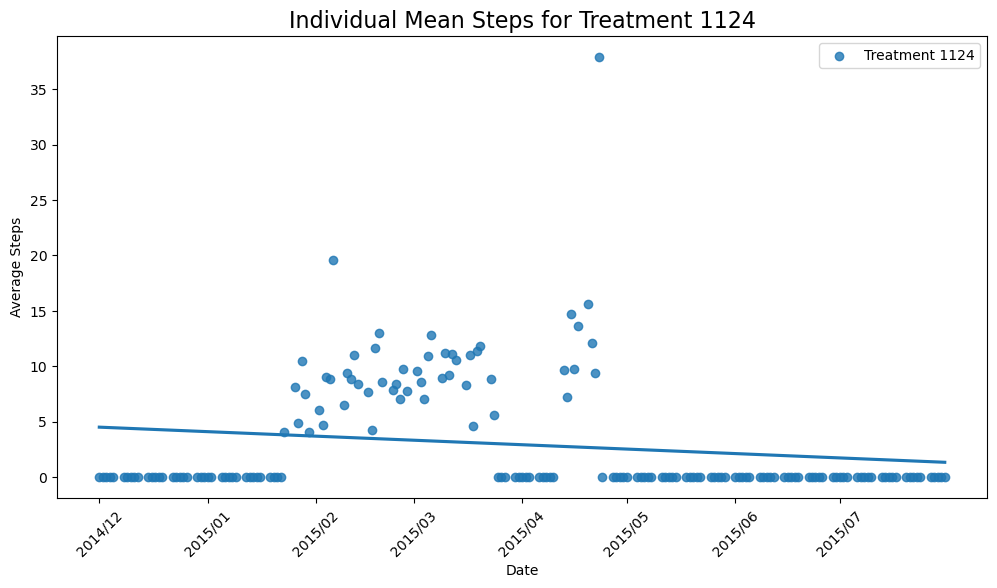

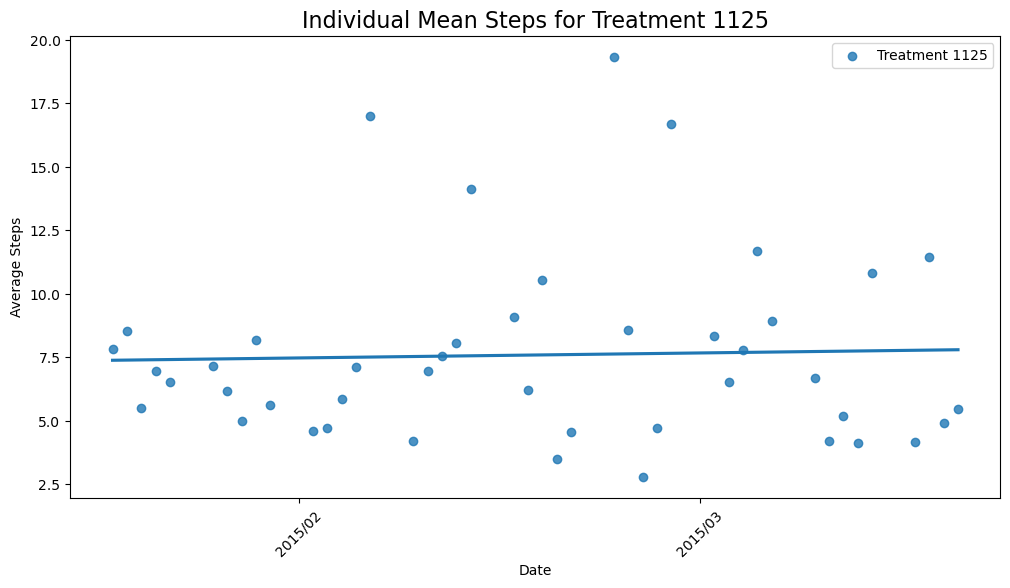

In [514]:
for treatment in treatment_ids:
    # Filter data for the current treatment_id
    subset = individual_means[individual_means['treatment_id'] == treatment].copy()

    # Convert 'date' to numeric for regression
    subset.loc[:, 'date_numeric'] = (subset['date'] - subset['date'].min()).dt.days

    # Prepare x-ticks (first day of each month)
    months = pd.date_range(start=subset['date'].min(), end=subset['date'].max(), freq='MS')
    month_numeric = (months - subset['date'].min()).days

    # Use show_plot function with modified label format
    show_plot(
        fig_size=(12, 6),
        reg_plot_data=subset,
        reg_plot_x='date_numeric',
        reg_plot_y='steps',
        reg_plot_scatter=True,
        reg_plot_ci=None,
        reg_plot_label=f'Treatment {treatment}',
        nbr_of_reg_plot=1,
        x_ticks_ticks=month_numeric,
        x_ticks_label=months.strftime('%Y/%m'),
        x_ticks_rotation=45,
        title=f"Individual Mean Steps for Treatment {treatment}",
        x_label="Date",
        y_label="Average Steps",
        legend=True
    )

### Plot 4: Average steps

In [515]:
# Compute the average of all individuals' steps per day
average_steps = df.groupby([df['date'].dt.date])['steps'].mean().reset_index()

In [516]:
# Convert 'date' back to datetime format
average_steps['date'] = pd.to_datetime(average_steps['date'])

In [517]:
# Calculate and print the average number of steps
overall_avg_steps = average_steps['steps'].mean()
print(f"Average number of steps: {overall_avg_steps:.2f} by minute")
print(f"Average number of steps: {overall_avg_steps * 60:.2f} by hour")
print(f"Average number of steps: {overall_avg_steps * 60 * 24:.2f} by day")

Average number of steps: 5.67 by minute
Average number of steps: 340.37 by hour
Average number of steps: 8168.95 by day


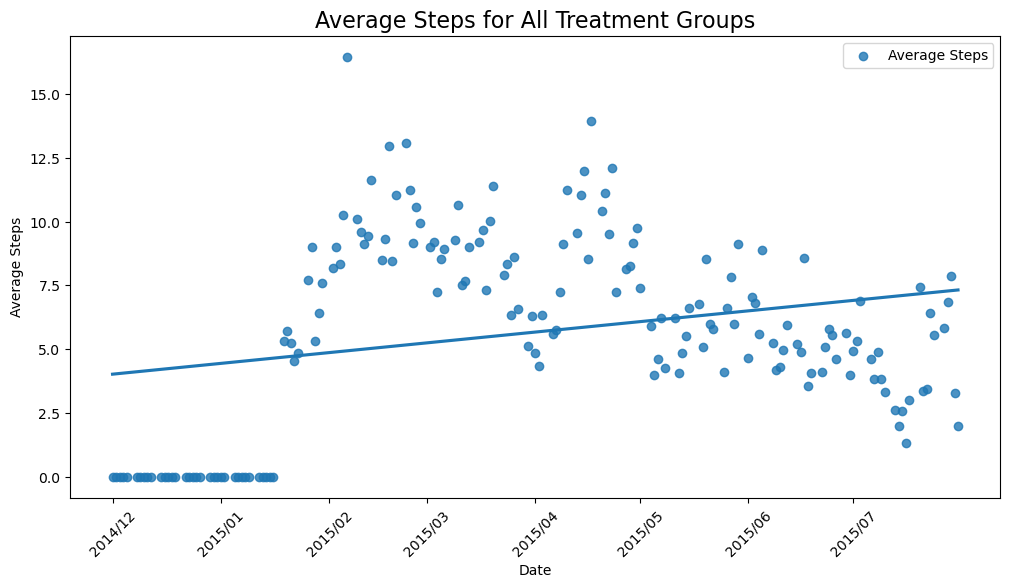

In [518]:
# Convert 'date' to numeric for regression
average_steps['date_numeric'] = (average_steps['date'] - average_steps['date'].min()).dt.days

# Prepare x-ticks (first day of each month)
months = pd.date_range(start=average_steps['date'].min(), end=average_steps['date'].max(), freq='MS')
month_numeric = (months - average_steps['date'].min()).days

# Use show_plot function with modified label format
show_plot(
    fig_size=(12, 6),
    reg_plot_data=average_steps,
    reg_plot_x='date_numeric',
    reg_plot_y='steps',
    reg_plot_scatter=True,
    reg_plot_ci=None,
    reg_plot_label='Average Steps',
    nbr_of_reg_plot=1,
    x_ticks_ticks=month_numeric,
    x_ticks_label=months.strftime('%Y/%m'),
    x_ticks_rotation=45,
    title="Average Steps for All Treatment Groups",
    x_label="Date",
    y_label="Average Steps",
    legend=True
)

### Plot 5: Individual plots with average steps superposed

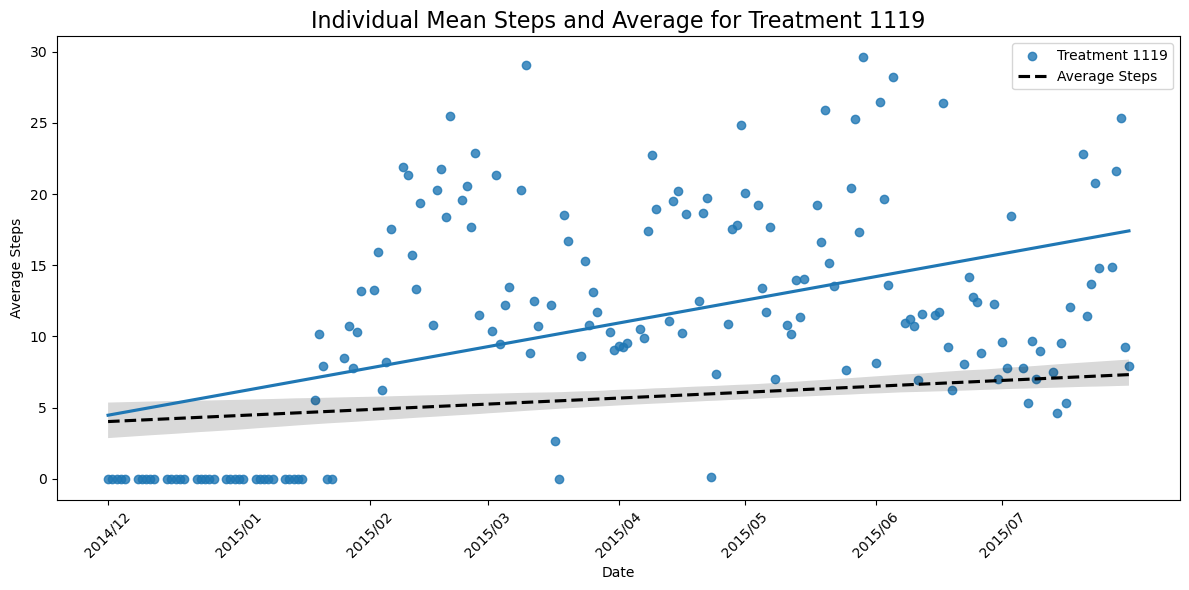

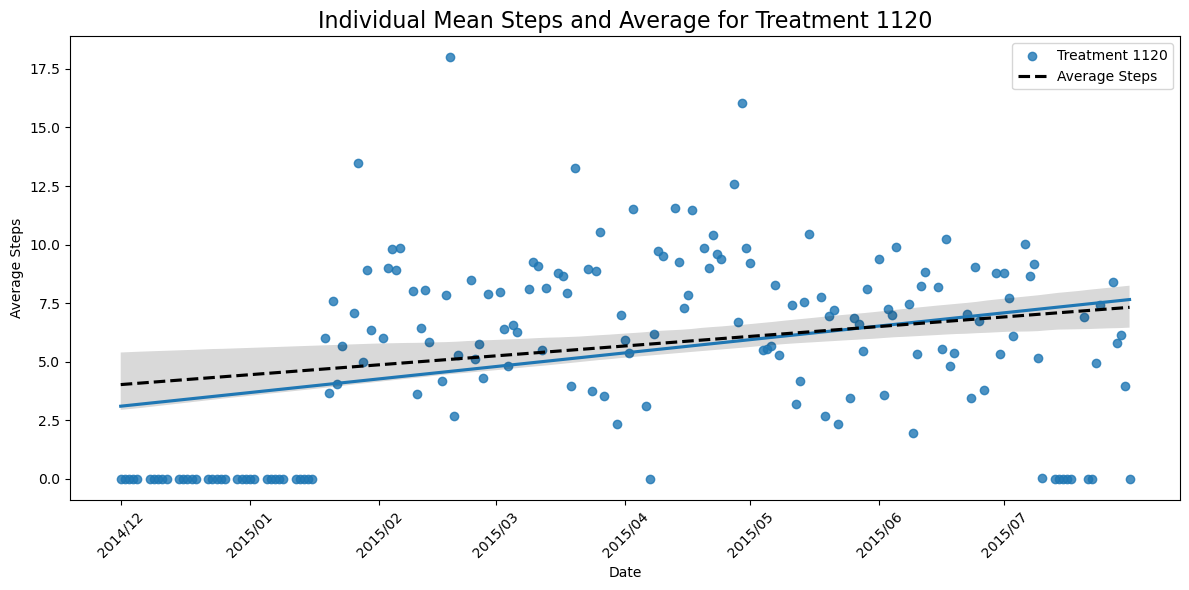

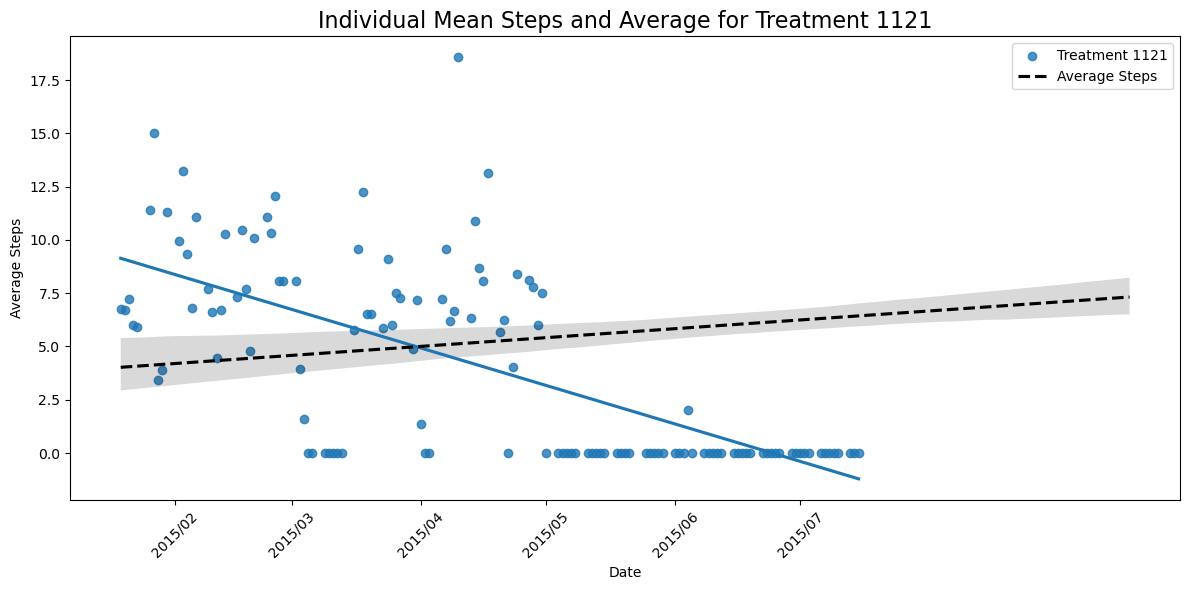

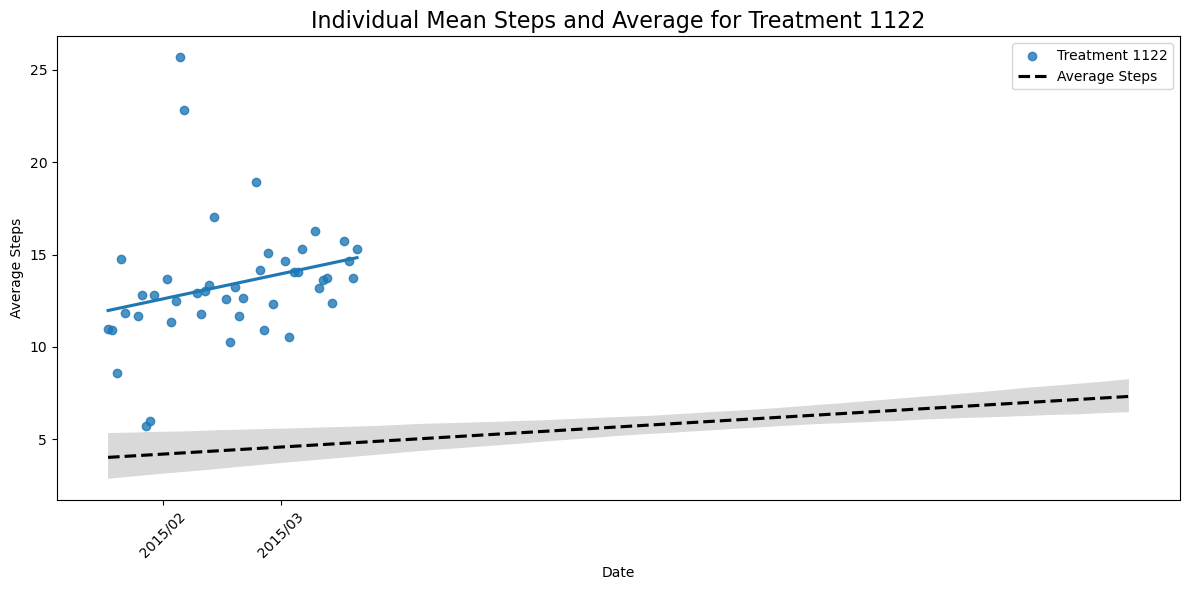

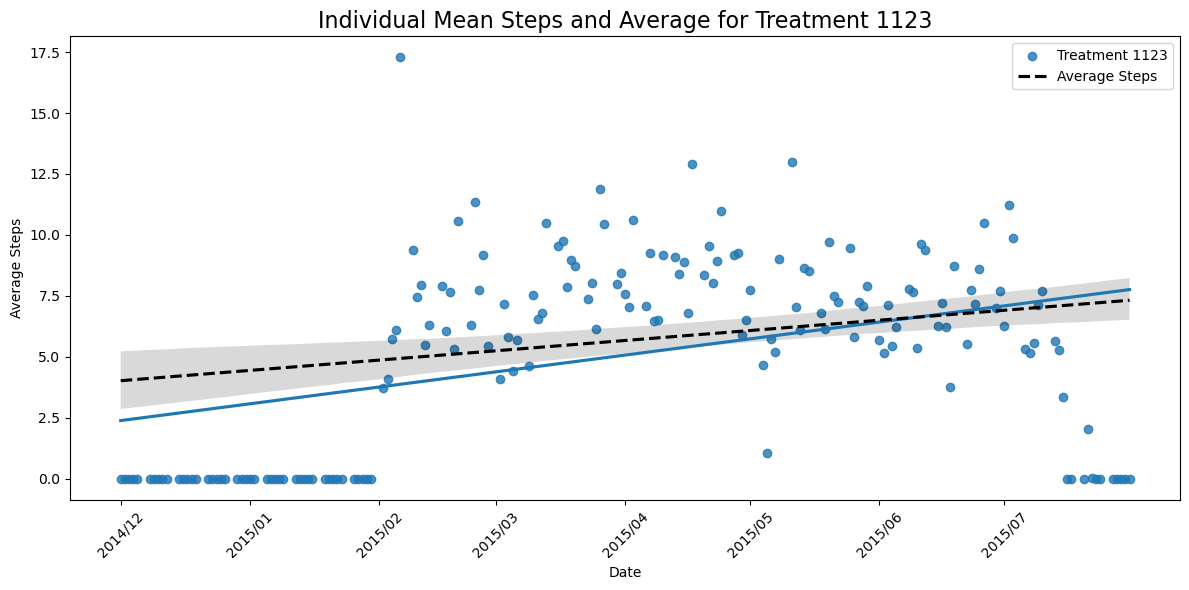

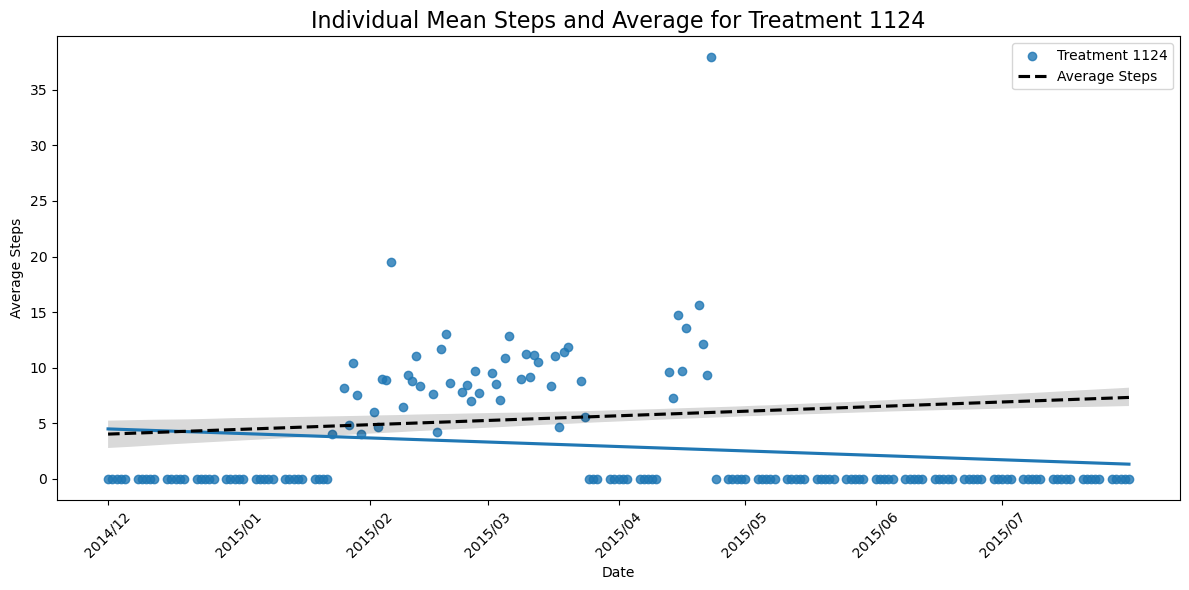

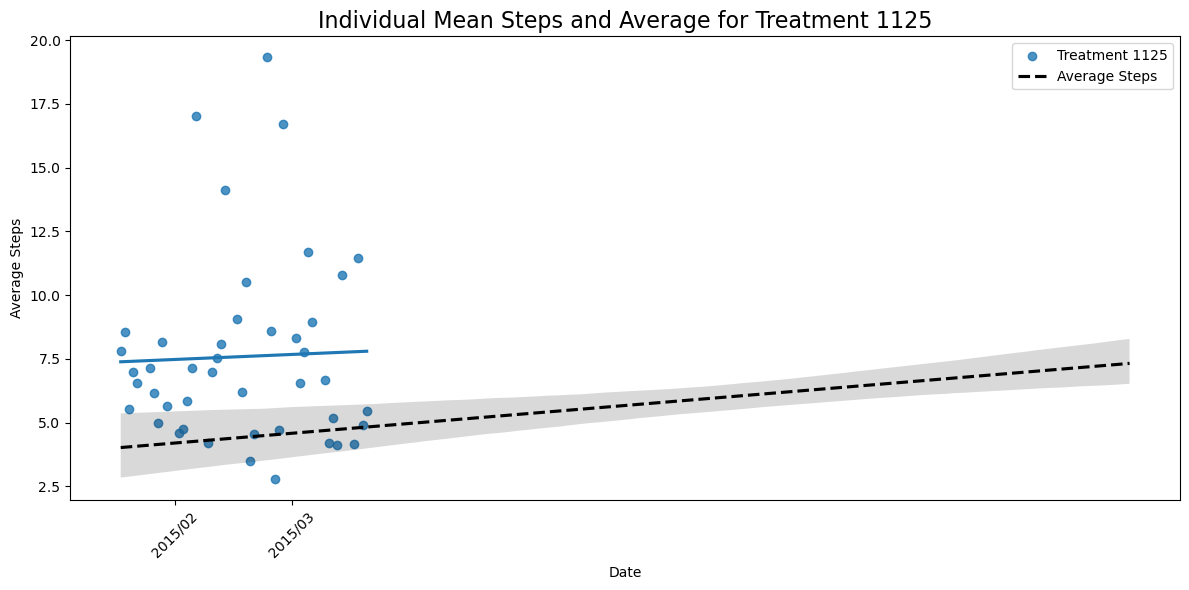

In [519]:
for treatment in treatment_ids:
    # Filter data for the current treatment_id
    subset = individual_means[individual_means['treatment_id'] == treatment].copy()
    
    # Convert 'date' to numeric for regression
    subset.loc[:, 'date_numeric'] = (subset['date'] - subset['date'].min()).dt.days
    
    # Prepare x-ticks (first day of each month)
    months = pd.date_range(start=subset['date'].min(), end=subset['date'].max(), freq='MS')
    month_numeric = (months - subset['date'].min()).days
    
    # Use show_plot function with both regressions
    show_plot(
        fig_size=(12, 6),
        reg_plot_data=[subset, average_steps],  # Liste des deux jeux de données
        reg_plot_x=['date_numeric', 'date_numeric'],  # Liste des deux variables x
        reg_plot_y=['steps', 'steps'],  # Liste des deux variables y
        reg_plot_scatter=[True, False],  # Scatter pour le 1er, ligne pour le 2nd
        reg_plot_ci=[None, 95],  # Pas d'intervalle de confiance pour les deux
        reg_plot_label=[
            f'Treatment {treatment}',  # Libellé avec tiret
            'Average Steps'           # Libellé avec tiret
        ],
        reg_plot_color=[None, 'black'],  # Couleur par défaut pour le 1er, noir pour le second
        reg_plot_line_kws=[
            None,  # Aucun style spécial pour la première régression
            {'color': 'black', 'linestyle': '--'}  # Style pour la moyenne
        ],
        nbr_of_reg_plot=2,  # Deux courbes de régression
        x_ticks_ticks=month_numeric,
        x_ticks_label=months.strftime('%Y/%m'),
        x_ticks_rotation=45,
        title=f"Individual Mean Steps and Average for Treatment {treatment}",
        x_label="Date",
        y_label="Average Steps",
        legend=True,
        tight_layout=[0, 0, 1, 1]  # Ajustement pour éviter les coupures
    )

### Plot 6: Superposed individuals and average steps

In [520]:
# Define a list of colors manually (you peux ajouter plus si nécessaire)
treatment_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [521]:
# Make sure there are enough colors for the number of treatment IDs
if len(treatment_ids) > len(treatment_colors):
    raise ValueError("Not enough colors for the number of treatment IDs!")

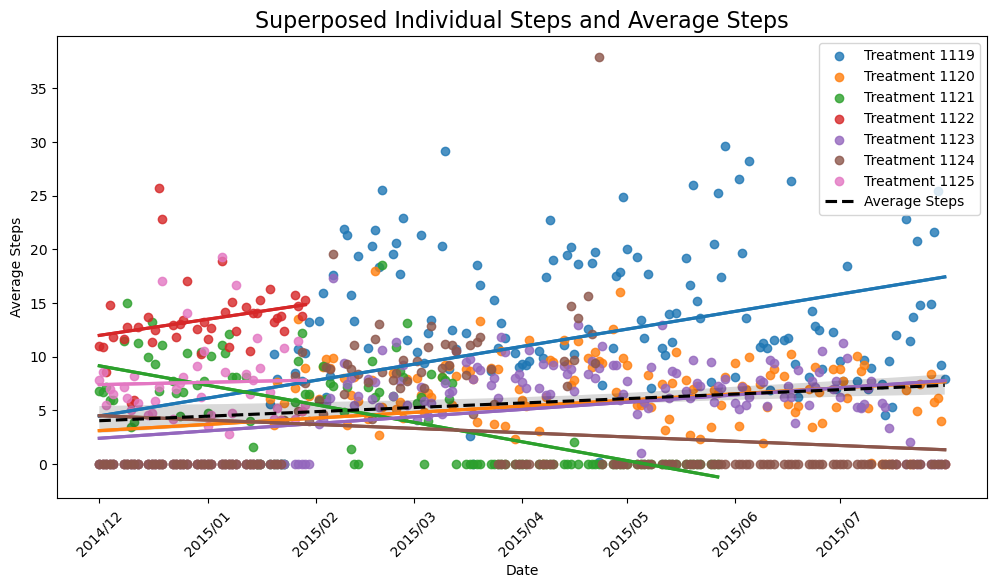

In [522]:
# Prepare common elements
months = pd.date_range(start=average_steps['date'].min(), end=average_steps['date'].max(), freq='MS')
month_numeric = (months - average_steps['date'].min()).days

# Prepare data for show_plot
reg_plot_data = []
reg_plot_x = []
reg_plot_y = []
reg_plot_scatter = []
reg_plot_ci = []
reg_plot_label = []
reg_plot_color = []
reg_plot_line_kws = []

# Loop through each treatment_id
for i, treatment in enumerate(treatment_ids):
    subset = individual_means[individual_means['treatment_id'] == treatment].copy()
    subset.loc[:, 'date_numeric'] = (subset['date'] - subset['date'].min()).dt.days

    # Add scatter plot parameters
    reg_plot_data.append(subset)
    reg_plot_x.append('date_numeric')
    reg_plot_y.append('steps')
    reg_plot_scatter.append(True)  # Show points
    reg_plot_ci.append(None)       # No confidence interval for scatter
    reg_plot_label.append(f'Treatment {treatment}')
    reg_plot_color.append(treatment_colors[i])
    reg_plot_line_kws.append(None)

    # Add regression line parameters
    reg_plot_data.append(subset)
    reg_plot_x.append('date_numeric')
    reg_plot_y.append('steps')
    reg_plot_scatter.append(False)  # Hide points (already shown)
    reg_plot_ci.append(None)        # No confidence interval
    reg_plot_label.append(None)     # No label (already in scatter)
    reg_plot_color.append(treatment_colors[i])
    reg_plot_line_kws.append(None)

# Add average steps line
reg_plot_data.append(average_steps)
reg_plot_x.append('date_numeric')
reg_plot_y.append('steps')
reg_plot_scatter.append(False)
reg_plot_ci.append(95)
reg_plot_label.append('Average Steps')
reg_plot_color.append('black')
reg_plot_line_kws.append({'color': 'black', 'linestyle': '--'})

# Calculate total number of plots (2 per treatment + 1 average)
nbr_of_reg_plot = len(treatment_ids) * 2 + 1

# Show the plot using your function
show_plot(
    fig_size=(12, 6),
    reg_plot_data=reg_plot_data,
    reg_plot_x=reg_plot_x,
    reg_plot_y=reg_plot_y,
    reg_plot_scatter=reg_plot_scatter,
    reg_plot_ci=reg_plot_ci,
    reg_plot_label=reg_plot_label,
    reg_plot_color=reg_plot_color,
    reg_plot_line_kws=reg_plot_line_kws,
    nbr_of_reg_plot=nbr_of_reg_plot,
    x_ticks_ticks=month_numeric,
    x_ticks_label=months.strftime('%Y/%m'),
    x_ticks_rotation=45,
    title="Superposed Individual Steps and Average Steps",
    x_label="Date",
    y_label="Average Steps",
    legend=True
)

### Plot 7: Correlation matrix

In [523]:
# Keep only numeric columns
df_numeric = df.select_dtypes(include=['number'])

In [524]:
# Compute correlation matrix
corr = df_numeric.corr()

In [525]:
# Remove columns that contain only NaN values
corr = corr.dropna(axis=1, how='all').dropna(axis=0, how='all')

In [526]:
# Define a threshold for correlation values
threshold = 0.1

In [527]:
# Create a mask excluding the diagonal
mask = (corr.abs() < threshold).sum(axis=0) == (corr.shape[0] - 1)

In [528]:
# Get columns where all correlations (except diagonal) are below the threshold
low_correlation_cols = corr.columns[mask]

In [529]:
# Drop these columns and rows from the correlation matrix
corr = corr.drop(columns=low_correlation_cols, index=low_correlation_cols)

In [530]:
# Print correlation matrix as a table
print("Correlation Matrix:")
print(corr)

Correlation Matrix:
              treatment_id  fitbit_id  calories      mets     level     steps  \
treatment_id      1.000000   0.494536 -0.086128 -0.079460 -0.062669 -0.082287   
fitbit_id         0.494536   1.000000 -0.112657 -0.072801 -0.067629 -0.059734   
calories         -0.086128  -0.112657  1.000000  0.979686  0.932253  0.952129   
mets             -0.079460  -0.072801  0.979686  1.000000  0.956063  0.965284   
level            -0.062669  -0.067629  0.932253  0.956063  1.000000  0.906922   
steps            -0.082287  -0.059734  0.952129  0.965284  0.906922  1.000000   
distance         -0.074817  -0.059446  0.954111  0.964491  0.904313  0.998532   

              distance  
treatment_id -0.074817  
fitbit_id    -0.059446  
calories      0.954111  
mets          0.964491  
level         0.904313  
steps         0.998532  
distance      1.000000  


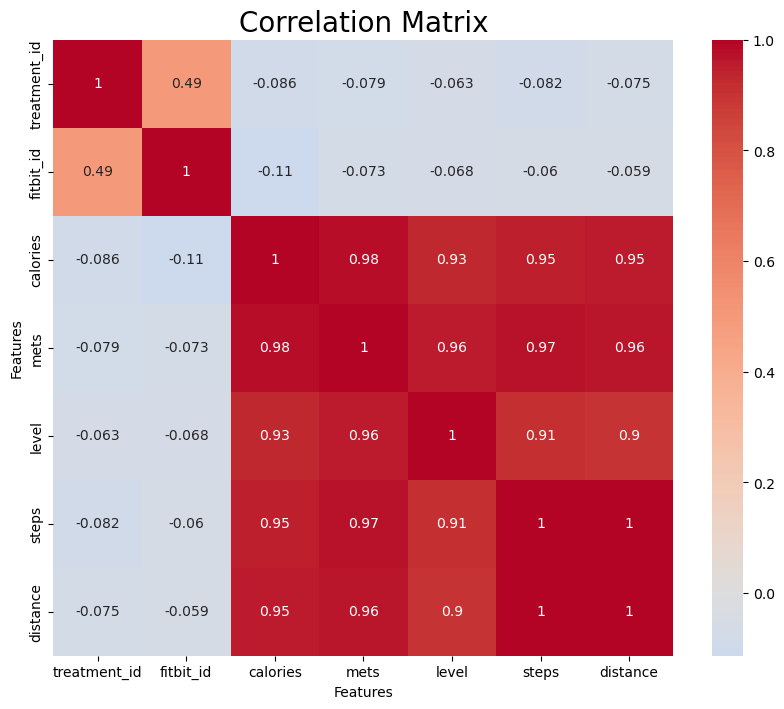

In [531]:
# Plot the correlation matrix
show_plot(fig_size=(10, 8), title="Correlation Matrix", x_label="Features",
        y_label="Features", heatmap_data=corr, heatmap_annot=True,
        heatmap_cmap='coolwarm', heatmap_center=0, tile_font_size=20)

### Plot 8: DAG graph

In [532]:
# Initialize a directed graph
dag = nx.DiGraph()

In [533]:
# Add nodes (dag_features)
dag_features = ['date', 'working_days', 'calories', 'mets', 'level', 'steps', 'distance', 'season']
dag.add_nodes_from(dag_features)

In [534]:
# Define the relationships based on correlation analysis
edges = [
    ('date', 'working_days'),
    ('date', 'season'),
    ('working_days', 'steps'),
    ('season', 'steps'),
    ('steps', 'calories'),
    ('steps', 'mets'),
    ('steps', 'level'),
    ('steps', 'distance'),
]

dag.add_edges_from(edges)

In [535]:
# Define custom positions for some nodes
pos = {
    'date': (0, 1),            # Position en haut pour 'date'
    'working_days': (-1, 0),   # Position à gauche pour 'working_days'
    'calories': (-1, -1),        # 'calories' au centre
    'mets': (0, -1),            # 'mets' à droite de 'calories'
    'season': (1, 0),          # 'level' en dessous de 'calories'
    'steps': (0, 0),          # 'steps' en dessous de 'mets'
    'distance': (-1, -2),        # 'distance' en bas de 'level'
    'level': (1, -2)        # 'distance' en bas de 'level'
}

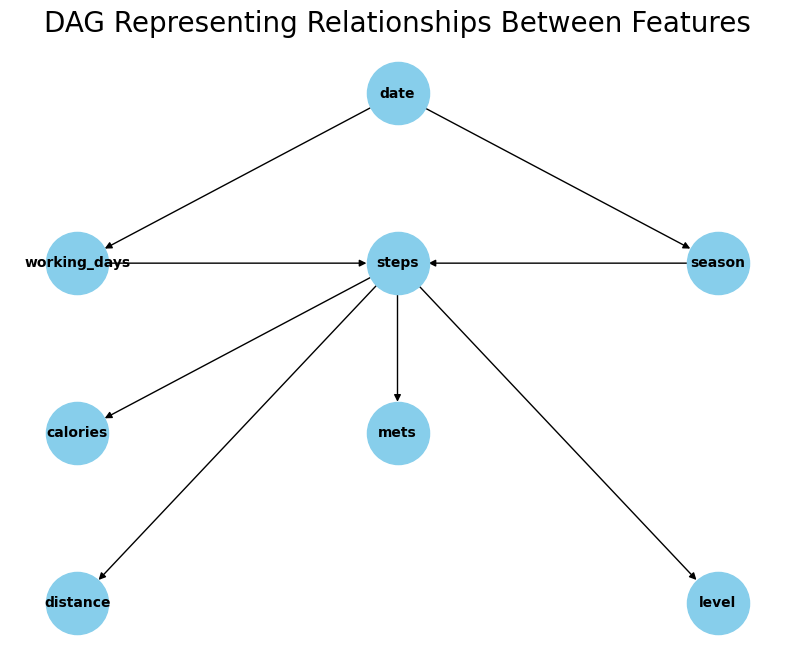

In [536]:
show_plot(fig_size=(10, 8), title="DAG Representing Relationships Between Features",
        tile_font_size=20, dag_graph=dag, dag_pos=pos,
        dag_with_labels=True, dag_node_size=2000, dag_node_color="skyblue",
        dag_node_font_size=10, dag_font_weight='bold', dag_edge_color='black')

## Step 2: Build a first version of the model

In [537]:
# Calculate the average number of steps per person at 18:00 on a working day
average_steps_per_person = df.groupby('treatment_id')['steps'].mean()

In [538]:
print("Average number of steps per person at 18:00 on a working day:")
print(average_steps_per_person)

Average number of steps per person at 18:00 on a working day:
treatment_id
1119    10.944042
1120     5.377593
1121     4.003055
1122    13.392677
1123     5.074360
1124     2.904963
1125     7.591098
Name: steps, dtype: float64


In [539]:
# Add 'season' feature
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [540]:
df['season'] = df['date'].apply(get_season)

In [541]:
# Add 'is_holiday' feature (assuming you have a list of holidays)
holidays = ['2023-01-01', '2023-12-25']  # Example list of holidays
df['is_holiday'] = df['date'].dt.strftime('%Y-%m-%d').isin(holidays)

In [542]:
# Add 'day_of_week' feature
df['day_of_week'] = df['date'].dt.weekday

In [543]:
# Add 'target' feature: whether the person reached their average steps
df['target'] = df.apply(lambda row: 1 if row['steps'] >= average_steps_per_person[row['treatment_id']] else 0, axis=1)

In [544]:
# Check the distribution of the target variable
print("\nDistribution of the target variable:")
print(df['target'].value_counts())


Distribution of the target variable:
target
0    863628
1    125652
Name: count, dtype: int64


In [545]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['season', 'day_of_week'], drop_first=False)

In [546]:
# Ensure all expected columns are present
expected_season_columns = ['season_Spring', 'season_Summer', 'season_Autumn', 'season_Winter']
expected_day_columns = ['day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4']

In [547]:
for col in expected_season_columns:
    if col not in df.columns:
        df[col] = 0

In [548]:
for col in expected_day_columns:
    if col not in df.columns:
        df[col] = 0

In [549]:
# Define features and target
features = ['calories', 'mets', 'level', 'distance', 'is_holiday'] + expected_season_columns + expected_day_columns

In [550]:
# Sort users by average steps (ascending)
sorted_users = average_steps_per_person.sort_values().index.tolist()  # Lowest to highest

In [551]:
# Find the median user
median_index = len(sorted_users) // 2

In [552]:
# Initialize variables
train_users = []  # Start with the median user
accuracy = 0
min_accuracy = 0.7
i = 1  # Start expanding from the median
direction = 1  # 1 for higher steps, -1 for lower steps

In [553]:
# Dynamically select training users until accuracy >= 0.7
while accuracy < min_accuracy and i < len(sorted_users):
    # Alternate between adding a higher-step user and a lower-step user
    if direction == 1 and median_index + i < len(sorted_users):
        train_users.append(sorted_users[median_index + i])  # Higher steps
    elif direction == -1 and median_index - i >= 0:
        train_users.append(sorted_users[median_index - i])  # Lower steps
    
    # Switch direction for the next iteration
    direction *= -1
    
    # Filter data for training and testing
    train_data = df[df['treatment_id'].isin(train_users)]
    test_data = df[~df['treatment_id'].isin(train_users)]
    
    # Prepare features and target for training and testing
    X_train = train_data[features]
    y_train = train_data['target']

    X_test = test_data[features]
    y_test = test_data['target']
    
    # Handle imbalanced data using SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Train a Random Forest Classifier
    model = RandomForestClassifier(random_state=42, class_weight='balanced')
    model.fit(X_train_resampled, y_train_resampled)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\nTraining users: {train_users}")
    print(f"Model Accuracy on Test Set: {accuracy:.2f}")
    
    i += 1


Training users: [1125]
Model Accuracy on Test Set: 0.99


In [554]:
# Final model evaluation
print("\nFinal Model Evaluation:")
print(f"Training users: {train_users}")
print(f"Model Accuracy on Test Set: {accuracy:.2f}")


Final Model Evaluation:
Training users: [1125]
Model Accuracy on Test Set: 0.99


In [555]:
# Classification report for detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    823718
           1       0.97      0.93      0.95    118042

    accuracy                           0.99    941760
   macro avg       0.98      0.96      0.97    941760
weighted avg       0.99      0.99      0.99    941760



In [556]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[820581   3137]
 [  8011 110031]]


In [557]:
# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
distance         0.315774
mets             0.298673
calories         0.252955
level            0.131923
day_of_week_0    0.000181
season_Winter    0.000142
day_of_week_3    0.000083
season_Spring    0.000080
day_of_week_2    0.000074
day_of_week_4    0.000069
day_of_week_1    0.000046
is_holiday       0.000000
season_Summer    0.000000
season_Autumn    0.000000
dtype: float64


In [558]:
# Check the distribution of users in training and testing sets
print("\nUsers in the training set:", train_data['treatment_id'].unique())
print("Users in the test set:", test_data['treatment_id'].unique())


Users in the training set: [1125]
Users in the test set: [1119 1120 1121 1122 1123 1124]


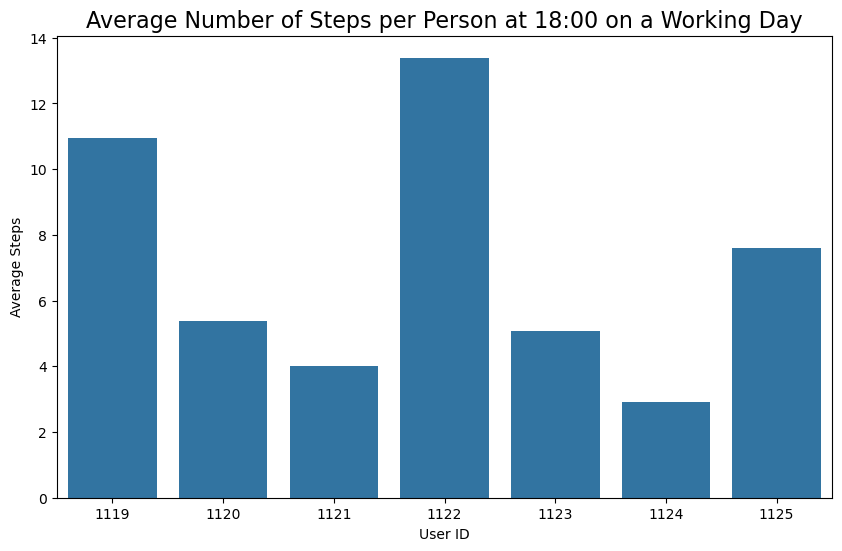

In [559]:
# Plot average steps per user
show_plot(fig_size=(10, 6), title="Average Number of Steps per Person at 18:00 on a Working Day",
        x_label="User ID", y_label="Average Steps", bar_plot_x=average_steps_per_person.index,
        bar_plot_y=average_steps_per_person.values)

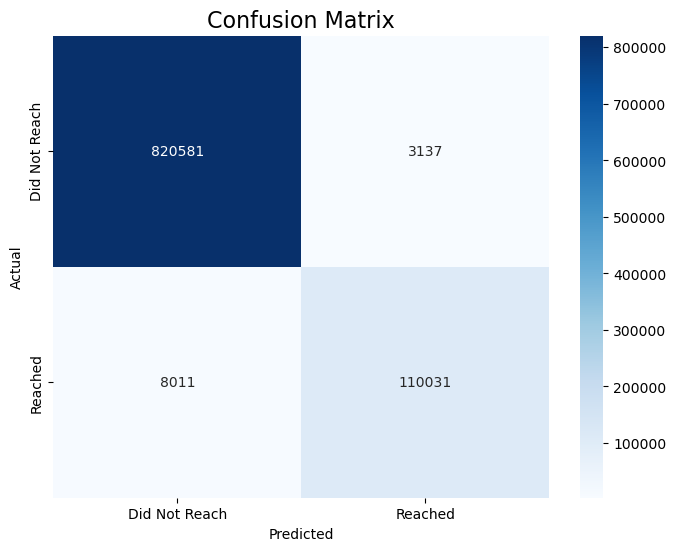

In [560]:
# Plot confusion matrix as a heatmap
labels = ['Did Not Reach', 'Reached']
show_plot(fig_size=(8, 6), title="Confusion Matrix",
        x_label="Predicted", y_label="Actual", heatmap_data=confusion_matrix(y_test, y_pred),
        heatmap_annot=True, heatmap_fmt='d', heatmap_cmap='Blues',
        heatmap_xticklabels=labels, heatmap_yticklabels=labels)

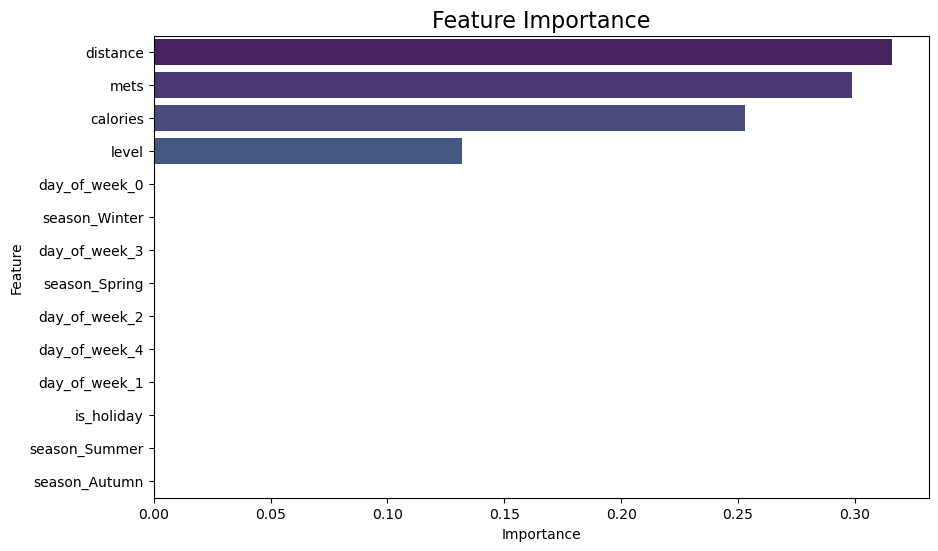

In [561]:
# Plot feature importance
show_plot(fig_size=(10, 6), title="Feature Importance", x_label="Importance",
        y_label="Feature", bar_plot_x=feature_importance.values,
        bar_plot_y=feature_importance.index,
        bar_plot_hue=feature_importance.index, bar_plot_palette='viridis',
        bar_plot_legend=False)

In [562]:
# Récupérer les utilisateurs les moins et les plus actifs
first = sorted_users[-1]  # Le plus actif (dernier élément)
last = sorted_users[0]    # Le moins actif (premier élément)

In [563]:
# Summary of findings
print("\nSummary of Findings:")
print("1. The average number of steps per person at 18:00 on a working day varies significantly:")
print(f"   - Most active user: treatment n°[{first}] ({average_steps_per_person[first]:.2f} steps)")
print(f"   - Least active user: treatment n°[{last}] ({average_steps_per_person[last]:.2f} steps)")
print("2. A Random Forest model was developed to predict whether a person will reach their average steps.")
print(f"   - Model accuracy: {accuracy:.2f}")
print("   - Key features influencing predictions: distance, mets, calories, and level.")
print("   - Seasonal and day-of-week features have minimal impact.")
print("3. The model can be used to provide personalized recommendations to users based on their activity patterns.")


Summary of Findings:
1. The average number of steps per person at 18:00 on a working day varies significantly:
   - Most active user: treatment n°[1122] (13.39 steps)
   - Least active user: treatment n°[1124] (2.90 steps)
2. A Random Forest model was developed to predict whether a person will reach their average steps.
   - Model accuracy: 0.99
   - Key features influencing predictions: distance, mets, calories, and level.
   - Seasonal and day-of-week features have minimal impact.
3. The model can be used to provide personalized recommendations to users based on their activity patterns.


In [564]:
# Save results to a text file
with open("assignment_results.txt", "w") as f:
    f.write("Assignment Results:\n")
    f.write("1. Average Steps per Person:\n")
    f.write(average_steps_per_person.to_string())
    f.write("\n\n2. Model Performance:\n")
    f.write(f"Accuracy: {accuracy:.2f}\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred))
    f.write("\nConfusion Matrix:\n")
    f.write(str(confusion_matrix(y_test, y_pred)))
    f.write("\n\n3. Feature Importance:\n")
    f.write(feature_importance.to_string())

In [566]:
# User input for prediction
def predict_for_user():
    print("\nPredict whether a user will reach their average steps:")
    hour = int(input("Enter the hour (0-23): "))
    day = int(input("Enter the day of the week (0=Monday, 6=Sunday): "))
    steps = float(input("Enter the current number of steps: "))
    calories = float(input("Enter the calories burned: "))
    mets = float(input("Enter the METs: "))
    level = float(input("Enter the activity level: "))
    distance = float(input("Enter the distance covered: "))
    is_holiday = int(input("Is it a holiday? (1=Yes, 0=No): "))

    # Create a DataFrame for the user input
    user_data = pd.DataFrame({
        'calories': [calories],
        'mets': [mets],
        'level': [level],
        'distance': [distance],
        'is_holiday': [is_holiday],
        'season_Spring': [0],
        'season_Summer': [0],
        'season_Autumn': [0],
        'season_Winter': [0],
        'day_of_week_0': [0],
        'day_of_week_1': [0],
        'day_of_week_2': [0],
        'day_of_week_3': [0],
        'day_of_week_4': [0]
    })

    # Set the correct season and day of the week
    user_data[f'season_{get_season(pd.to_datetime("2023-01-01"))}'] = 1  # Replace with actual date logic
    user_data[f'day_of_week_{day}'] = 1

    # Predict
    prediction = model.predict(user_data[features])
    if prediction[0] == 1:
        print("\nPrediction: The user will reach their average steps.")
    else:
        print("\nPrediction: The user will NOT reach their average steps.")

# Run the prediction function
predict_for_user()


Predict whether a user will reach their average steps:

Prediction: The user will reach their average steps.
